# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
import matplotlib

matplotlib.__version__

'3.7.2'

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame using an inner merge on "Mouse ID"
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

# Define a function for background gradient
def background_gradient(s):
    cmap = 'coolwarm'
    return ['background-color: lightgrey' if v % 2 == 0 else 'background-color: white' for v in range(len(s))]

# Apply the background gradient to the DataFrame and display it
styled_table = merged_data.style.apply(background_gradient)
styled_table.to_excel("styled_table.xlsx", engine='openpyxl', index=False)
styled_table




In [3]:
# Checking the number of mice.
# Checking the number of mice
num_mice = merged_data["Mouse ID"].nunique()

# Display the result
print(f"The number of mice is: {num_mice}")


The number of mice is: 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

# Extract the unique Mouse IDs from the duplicates
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

# Display the result
print("The duplicate mice by ID number are:", duplicate_mouse_ids)


The duplicate mice by ID number are: ['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# Filter the merged_data DataFrame for rows where 'Mouse ID' is 'g989'
duplicate_mouse_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mouse_ids)]

# Display all data for the duplicate mouse ID without slashes
print(duplicate_mouse_data.to_string(index=False))



Mouse ID Drug Regimen    Sex  Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
    g989     Propriva Female          21          26          0           45.000000                 0
    g989     Propriva Female          21          26          0           45.000000                 0
    g989     Propriva Female          21          26          5           48.786801                 0
    g989     Propriva Female          21          26          5           47.570392                 0
    g989     Propriva Female          21          26         10           51.745156                 0
    g989     Propriva Female          21          26         10           49.880528                 0
    g989     Propriva Female          21          26         15           51.325852                 1
    g989     Propriva Female          21          26         15           53.442020                 0
    g989     Propriva Female          21          26         20           55.32612

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Create a clean DataFrame by dropping rows where Mouse ID is 'g989'
cleaned_data = merged_data[merged_data['Mouse ID'] != 'g989']

# Display the clean DataFrame without slashes
print(cleaned_data.to_string(index=False))




Mouse ID Drug Regimen    Sex  Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
    k403     Ramicane   Male          21          16          0           45.000000                 0
    k403     Ramicane   Male          21          16          5           38.825898                 0
    k403     Ramicane   Male          21          16         10           35.014271                 1
    k403     Ramicane   Male          21          16         15           34.223992                 1
    k403     Ramicane   Male          21          16         20           32.997729                 1
    k403     Ramicane   Male          21          16         25           33.464577                 1
    k403     Ramicane   Male          21          16         30           31.099498                 1
    k403     Ramicane   Male          21          16         35           26.546993                 1
    k403     Ramicane   Male          21          16         40           24.36550

In [7]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice in the clean DataFrame
num_mice_clean = cleaned_data["Mouse ID"].nunique()

# Display the result
print(f"The number of mice in the clean DataFrame is: {num_mice_clean}")


The number of mice in the clean DataFrame is: 248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group by 'Drug Regimen' and calculate summary statistics
summary_statistics = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_statistics = summary_statistics.rename(columns={
    'mean': 'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard Deviation',
    'sem': 'SEM'
})

# Display the summary statistics DataFrame
print(summary_statistics)


                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Using the aggregation method to calculate summary statistics
summary_statistics_advanced = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM='sem'
)

# Define a function for background gradient
def background_gradient(s):
    cmap = 'coolwarm'
    return ['background-color: lightgrey' if v % 2 == 0 else 'background-color: white' for v in range(len(s))]

# Apply the background gradient to the advanced summary statistics DataFrame
styled_summary_advanced = summary_statistics_advanced.reset_index().style.apply(background_gradient)

# Display the styled advanced summary statistics DataFrame
styled_summary_advanced.to_excel("styled_summary_advanced.xlsx", engine='openpyxl', index=False)
styled_summary_advanced


,Drug Regimen,Mean,Median,Variance,Standard_Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

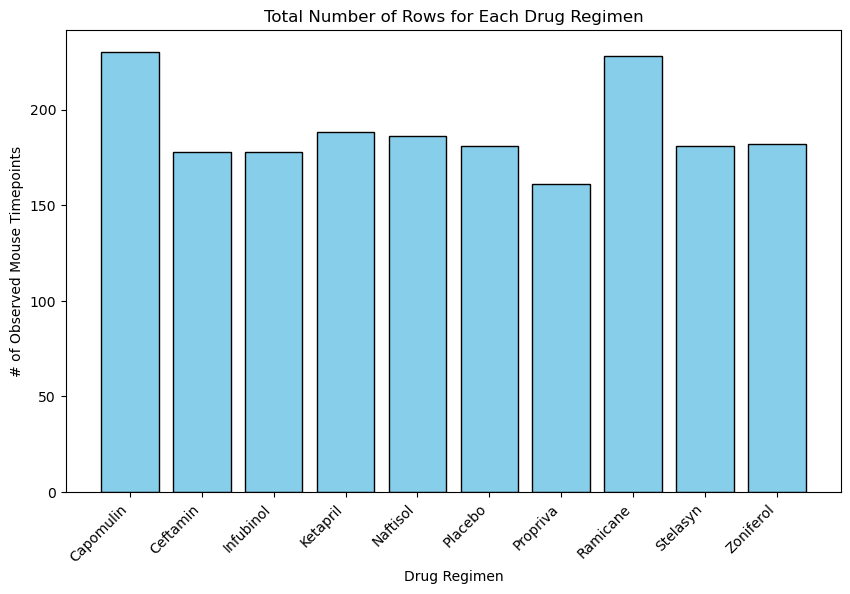

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
import matplotlib.pyplot as plt

# Group by 'Drug Regimen' and calculate the count of rows
regimen_counts = merged_data.groupby('Drug Regimen').size()

# Plot the bar chart using pyplot with updated y-axis label
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts, color='skyblue', edgecolor='black')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')  # Updated y-axis label
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()



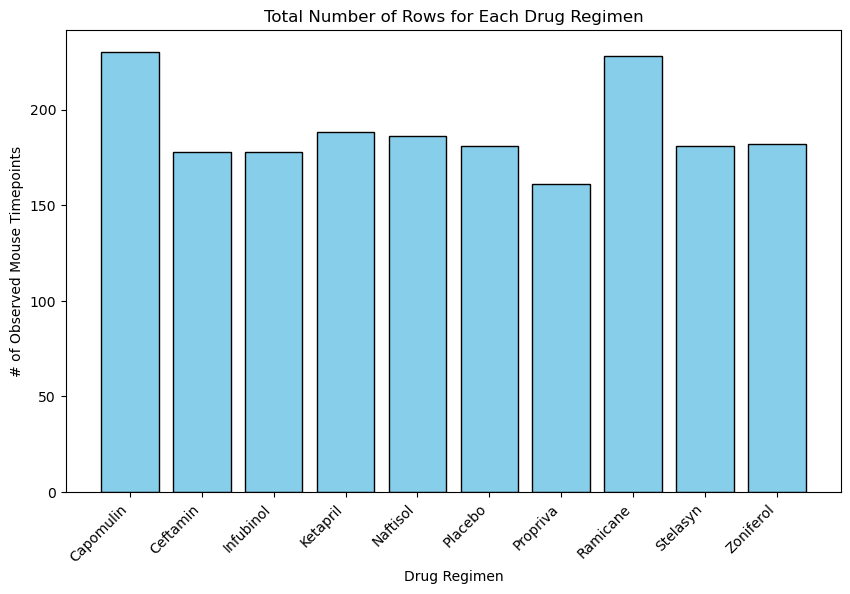

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

# Group by 'Drug Regimen' and calculate the count of rows
regimen_counts = merged_data.groupby('Drug Regimen').size()

# Plot the bar chart using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts, color='skyblue', edgecolor='black')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


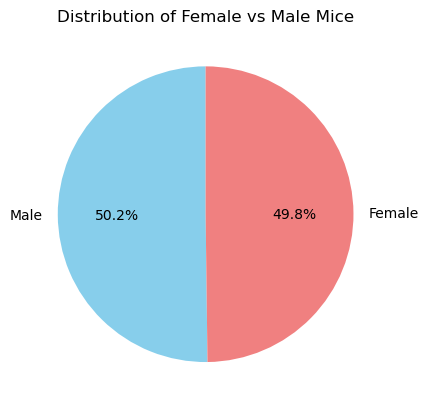

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
import matplotlib.pyplot as plt

# Group by 'Sex' and calculate the count of mice
sex_distribution = mouse_metadata['Sex'].value_counts()

# Plot the pie chart using Pandas
sex_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('')  # Remove y-axis label
plt.show()



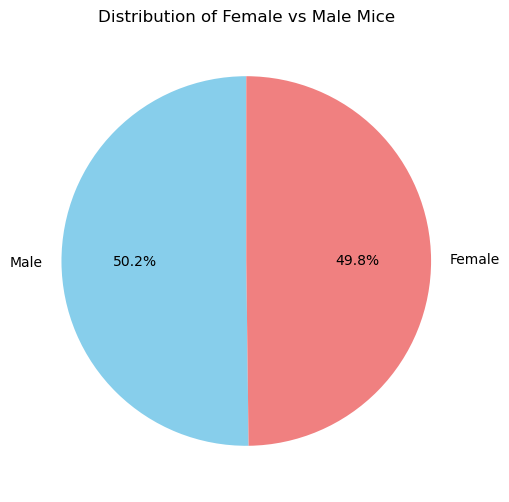

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt

# Group by 'Sex' and calculate the count of mice
sex_distribution = mouse_metadata['Sex'].value_counts()

# Plot the pie chart using pyplot
plt.figure(figsize=(6, 6))
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Distribution of Female vs Male Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Extract the relevant treatment regimens
target_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the data for the target regimens
target_data = merged_data[merged_data['Drug Regimen'].isin(target_regimens)]

# Get the index of the row with the maximum 'Timepoint' for each mouse
max_timepoint_indices = target_data.groupby('Mouse ID')['Timepoint'].idxmax()

# Use the indices to extract the corresponding rows
final_tumor_volume = target_data.loc[max_timepoint_indices]

# Display the DataFrame with the final tumor volume
print(final_tumor_volume)










     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
463      a203    Infubinol  Female          20          23         45   
473      a251    Infubinol  Female          21          25         45   
493      a275     Ceftamin  Female          20          28         45   
327      a411     Ramicane    Male           3          22         45   
430      a444     Ramicane  Female          10          25         45   
...       ...          ...     ...         ...         ...        ...   
1845     y769     Ceftamin  Female           6          27         45   
124      y793    Capomulin    Male          17          17         45   
1855     y865     Ceftamin    Male          23          26         45   
84       z578     Ramicane    Male          11          16         45   
1872     z581    Infubinol  Female          24          25         45   

      Tumor Volume (mm3)  Metastatic Sites  
463            67.973419                 2  
473            65.525743         

In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

    # Put treatments into a list for for loop (and later for plot labels)
target_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Loop through each treatment regimen
for regimen in target_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']
    
    # Add subset to tumor volume data list
    tumor_volume_data.append(tumor_volumes)
    
    # Calculate the IQR for each regimen
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Print the results
    print(f"Regimen: {regimen}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    
    # Identify potential outliers
    potential_outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"Potential Outliers: {potential_outliers}\n")

# Display the tumor volume data list
print("Tumor Volume Data:")
print(tumor_volume_data)


Regimen: Capomulin
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Regimen: Ramicane
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Regimen: Infubinol
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: 669    36.321346
Name: Tumor Volume (mm3), dtype: float64

Regimen: Ceftamin
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Tumor Volume Data:
[309     38.982878
299     38.939633
64      30.485985
244     37.074024
360     40.159220
440     47.685963
204     37.311846
337     38.125164
317     38.753265
380     41.483008
282     38.846876
39      28.430964
144     33.329098
1455    46.539206
134     32.377357
390

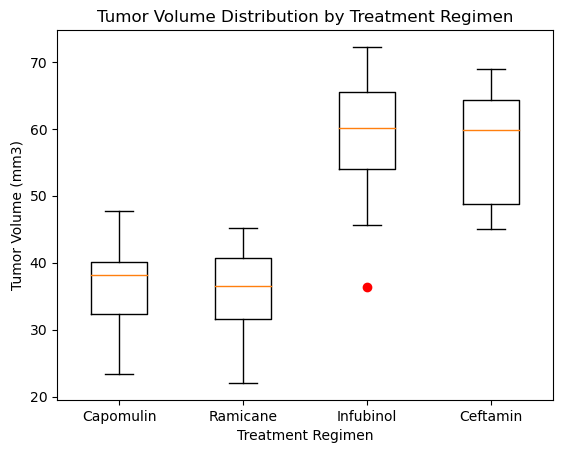

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Generate a box plot for each treatment group
plt.boxplot(tumor_volume_data, labels=target_regimens, sym='ro')  # 'sym' adds red dots for potential outliers
plt.title('Tumor Volume Distribution by Treatment Regimen')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

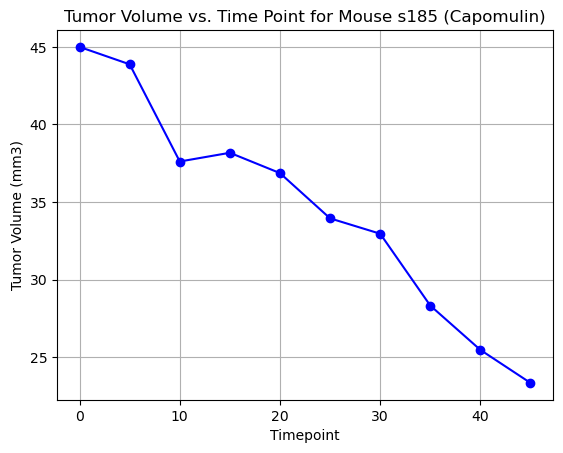

In [36]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Choose a mouse treated with Capomulin
capomulin_mouse_id = cleaned_data.loc[cleaned_data['Drug Regimen'] == 'Capomulin', 'Mouse ID'].iloc[0]

# Filter data for the chosen mouse and Capomulin treatment
capomulin_data = cleaned_data[(cleaned_data['Drug Regimen'] == 'Capomulin') & (cleaned_data['Mouse ID'] == capomulin_mouse_id)]

# Generate a line plot for tumor volume vs. time point
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='blue')
plt.title(f'Tumor Volume vs. Time Point for Mouse {capomulin_mouse_id} (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()



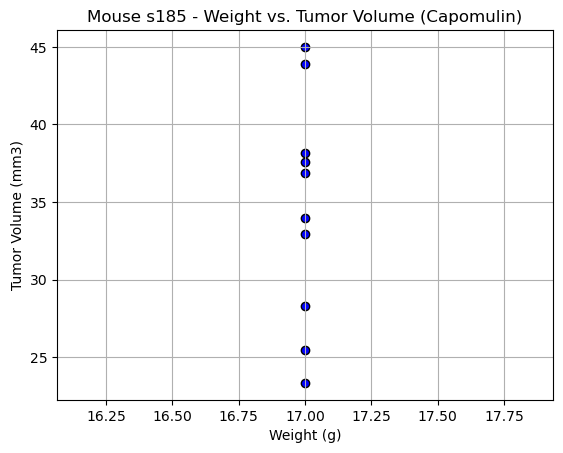

In [41]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Filter data for mouse s185
mouse_s185_data = capomulin_data[capomulin_data['Mouse ID'] == 's185']

# Generate a scatter plot
plt.scatter(mouse_s185_data['Weight (g)'], mouse_s185_data['Tumor Volume (mm3)'], marker='o', facecolors='blue', edgecolors='black')
plt.title('Mouse s185 - Weight vs. Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()




## Correlation and Regression

<module 'matplotlib.pyplot' from 'C:\\Users\\coleo\\anaconda3\\anaconda3 final\\envs\\dev\\lib\\site-packages\\matplotlib\\pyplot.py'>

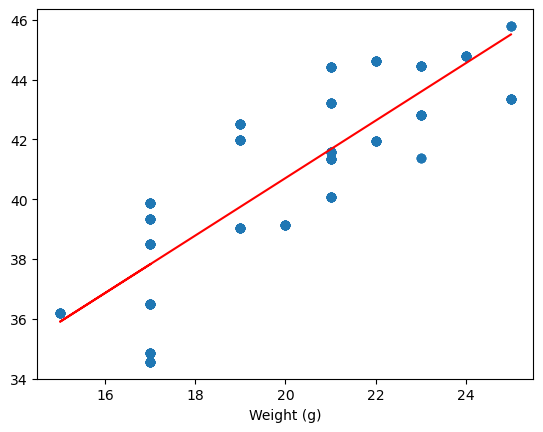

In [42]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Dependencies
from scipy.stats import linregress

# Filter data for Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge with mouse weight data
capomulin_weight_volume = pd.merge(capomulin_data[['Mouse ID', 'Weight (g)']], average_tumor_volume, on='Mouse ID')

# Calculate the correlation coefficient
correlation_coefficient = capomulin_weight_volume['Weight (g)'].corr(capomulin_weight_volume['Tumor Volume (mm3)'])

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_weight_volume['Weight (g)'], capomulin_weight_volume['Tumor Volume (mm3)'])

# Create a linear regression equation
regress_values = capomulin_weight_volume['Weight (g)'] * slope + intercept

# Plot the scatter plot with linear regression
plt.scatter(capomulin_weight_volume['Weight (g)'], capomulin_weight_volume['Tumor Volume (mm3)'])
plt.plot(capomulin_weight_volume['Weight (g)'], regress_values, color='red')

# Add labels and title
plt.xlabel('Weight (g)')
plt
